# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 *meters per second* of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import gmaps

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

date = datetime.date.today()
print("Beginning Data Retrieval")
print("-" * 30)
set = 1
count = 1
for city in cities:
    try:
        print(f"Processing Record {count} | {city}")
        query_url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        #Append results to the empty lists
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(datetime.datetime.now())
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        count += 1
    except KeyError:
        print("City not found. Skipping...")
print("-"*30)
print("Data Retrieval Complete")



Beginning Data Retrieval
------------------------------
Processing Record 1 | port alfred
Processing Record 2 | dikson
Processing Record 3 | butaritari
Processing Record 4 | jiddah
City not found. Skipping...
Processing Record 4 | qaanaaq
Processing Record 5 | sharjah
Processing Record 6 | mar del plata
Processing Record 7 | barrow
Processing Record 8 | hermanus
Processing Record 9 | svetlyy yar
Processing Record 10 | udayagiri
Processing Record 11 | kapaa
Processing Record 12 | vinh
Processing Record 13 | rikitea
Processing Record 14 | saleaula
City not found. Skipping...
Processing Record 14 | oussouye
Processing Record 15 | hobart
Processing Record 16 | nome
Processing Record 17 | punta arenas
Processing Record 18 | nouadhibou
Processing Record 19 | jumla
Processing Record 20 | laguna
Processing Record 21 | mount isa
Processing Record 22 | cidreira
Processing Record 23 | attawapiskat
City not found. Skipping...
Processing Record 23 | khargone
Processing Record 24 | stornoway
City no

Processing Record 199 | vila velha
Processing Record 200 | marienburg
Processing Record 201 | severo-yeniseyskiy
Processing Record 202 | kenai
Processing Record 203 | arraial do cabo
Processing Record 204 | noumea
Processing Record 205 | namibe
Processing Record 206 | sorland
Processing Record 207 | zhezkazgan
Processing Record 208 | uppsala
Processing Record 209 | torbay
Processing Record 210 | buta
Processing Record 211 | potgietersrus
City not found. Skipping...
Processing Record 211 | beroroha
Processing Record 212 | la ronge
Processing Record 213 | caravelas
Processing Record 214 | abu dhabi
Processing Record 215 | taksimo
Processing Record 216 | loubomo
City not found. Skipping...
Processing Record 216 | sao pedro da aldeia
Processing Record 217 | coihaique
Processing Record 218 | saint-augustin
Processing Record 219 | grindavik
Processing Record 220 | samusu
City not found. Skipping...
Processing Record 220 | ginir
Processing Record 221 | bethel
Processing Record 222 | champeric

Processing Record 408 | berdigestyakh
Processing Record 409 | birjand
Processing Record 410 | yanan
City not found. Skipping...
Processing Record 410 | geraldton
Processing Record 411 | bairiki
City not found. Skipping...
Processing Record 411 | aguililla
Processing Record 412 | pringsewu
Processing Record 413 | mendoza
Processing Record 414 | kupang
Processing Record 415 | yairipok
Processing Record 416 | kavaratti
Processing Record 417 | naze
Processing Record 418 | angoche
Processing Record 419 | cherskiy
Processing Record 420 | santa cruz del sur
Processing Record 421 | karauzyak
City not found. Skipping...
Processing Record 421 | gorontalo
Processing Record 422 | majene
Processing Record 423 | makuyuni
Processing Record 424 | saint-pierre
Processing Record 425 | lufkin
Processing Record 426 | sisimiut
Processing Record 427 | nhulunbuy
Processing Record 428 | waipawa
Processing Record 429 | penzance
Processing Record 430 | benghazi
Processing Record 431 | alyangula
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Build dataframe incorporating all variables
cities_df = pd.DataFrame({'City': city_name,
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date': date,
                          'Humidity': humidity,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temp': max_temp,
                          'Wind Speed': wind_speed
                         })
cities_df.head()

#Export cities data to .csv
cities_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [269]:
#Check for missing data
cities_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Latitude      567
Longitude     567
Max Temp      567
Wind Speed    567
dtype: int64

In [12]:
#Review dataframe structure
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Port Alfred,0,ZA,2019-01-13 12:19:50.300192,79,-33.59,26.89,70.48,12.77
1,Dikson,80,RU,2019-01-13 12:19:50.464605,92,73.51,80.55,1.00,31.12
2,Butaritari,64,KI,2019-01-13 12:19:50.664618,100,3.07,172.79,81.86,15.12
3,Qaanaaq,0,GL,2019-01-13 12:19:50.781117,78,77.48,-69.36,-25.96,9.98
4,Sharjah,0,AE,2019-01-13 12:19:50.940970,49,25.36,55.39,73.40,8.05


#### Hemisphere Breakdown

In [92]:
north = sum(i>0 for i in cities_df['Latitude'])
south = sum(i<0 for i in cities_df['Latitude'])
total_cities = north + south


print(f"Of the {total_cities} cities in the above list, {north} are located in the northern hemisphere, and {south} are in the southern hemisphere.")

Of the 548 cities in the above list, 394 are located in the northern hemisphere, and 154 are in the southern hemisphere.


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

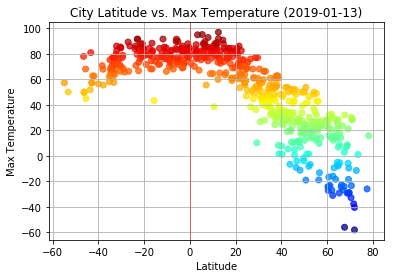

In [40]:
#Build plot
plt.scatter(lat, max_temp, marker="o", c=max_temp, cmap="jet", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True)
plt.show

#Export to png
plt.savefig("Images/max_temp_bubble_plot.png", bbox_inches="tight")

## Observation 1:
We can see as the data points move away from the equator (0 deg. latitude, emphasized here in red) they trend to cooler temperatures. 

## Observation 2:
While there are significantly more data points represented in the northern hemisphere ({north}) than the southern ({south}), we can also see a much more diverse range of temperatures. 

## Observation 3: 
This observation is dependant on the time that the data was pulled. 
Despite it being different seasons in the northern and southern hemispheres due to axial tilt, the max temperatures within 20 degrees of the equator are about the same. It would be valuable to see if that trend is still true in six months when the southern hemisphere is in winter, and the northern is in summer. 

#### Latitude vs. Humidity Plot

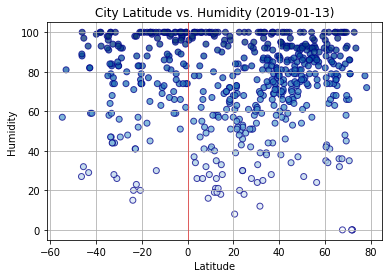

In [39]:
#Build plot
plt.scatter(lat, humidity, marker="o", c=humidity, cmap="Blues", edgecolors="darkblue", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)

#Export to png
plt.savefig("Images/humidity_scatter_plot.png", bbox_inches="tight")

## Observation 3:
Humidity does not seem to correlate to distance from the equator.

There also does not seem to be a significant difference between levels of humidity when comparing northern and southern hemispheres -- though the least humid spots are in the northern hemisphere, with the 0% humidity cities above 60 degrees in latitude.

#### Latitude vs. Cloudiness Plot

Text(90, 50, 'Note: Circle size \ncorrelates with \ncloudiness')

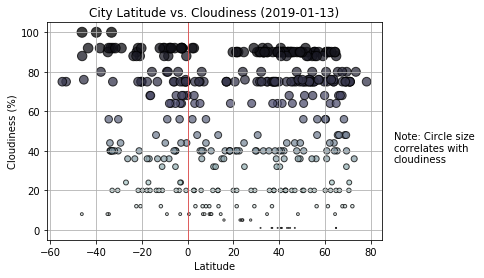

In [38]:
#Build plot
plt.scatter(lat, cloudiness, marker="o", c=cloudiness, s=cloudiness*5, cmap="bone_r", edgecolors="black", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)


# Incorporate a text label regarding circle size
plt.text(90,50, "Note: Circle size \ncorrelates with \ncloudiness", ha="left", va="top")

# Export to png
plt.savefig("Images/cloudiness_bubble_plot.png", bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

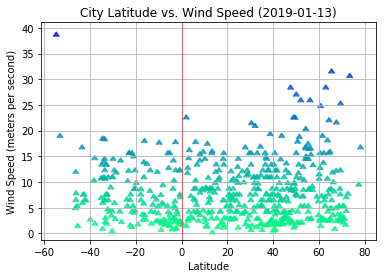

In [93]:
#Build plot
plt.scatter(lat, wind_speed, marker=6, c=wind_speed, cmap="winter_r", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters per second)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)

# plt.savefig("Images/wind_speed_plot.png", bbox_inches="tight")

## Heatmap of Humidity in the list of randomly selected cities

In [96]:
#Set locations and data type
locations = cities_df[['Latitude', 'Longitude']].astype(float)
humid = cities_df['Humidity'].astype(float)

#Set auto-zoom of map
center=(0.0,0.0)
fig = gmaps.figure(center=center, zoom_level=1)

#Build & apply heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humid, dissipating=False, max_intensity=100, point_radius=4)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Heatmap of Cloudiness in the list of randomly selected cities

In [50]:
#Set locations and data type
locations = cities_df[['Latitude', 'Longitude']].astype(float)
clouds = cities_df['Cloudiness'].astype(float)

#Set auto-zoom of map
center=(0.0,0.0)
fig = gmaps.figure(center=center, zoom_level=1)

#Build & apply heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=50, point_radius=4)
heat_layer.gradient = [(0,0,0,0),  (192,192,192,1), (169,169,169,1),(128,128,128,.5),(105,105,105,1)]

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))